<a href="https://colab.research.google.com/github/Rapurva/Financial-Trials/blob/master/ADX_Indicator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22411 sha256=c5fb4a93f960ba5ee5180d8b7c846180d50786d7be33665509b267d2fea55517
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [7]:
!pip install ta

  Created wheel for ta: filename=ta-0.5.11-cp36-none-any.whl size=23029 sha256=b5d0d850e208e73cdd75b70b65bd7ac4aba172a4c3cccf5bb844659b1d65b06e
  Stored in directory: /root/.cache/pip/wheels/97/32/1d/cbc724a8ecaec6e426baf57ab8c4c2cdc687aadd7427280b1f
Successfully built ta


In [27]:
import yfinance as yf
aapl = yf.download('TATAPOWER.NS', '2017-1-1','2020-1-09')

[*********************100%***********************]  1 of 1 completed


In [0]:
aapl['Adj Open'] = aapl.Open * aapl['Adj Close']/aapl['Close']
aapl['Adj High'] = aapl.High * aapl['Adj Close']/aapl['Close']
aapl['Adj Low'] = aapl.Low * aapl['Adj Close']/aapl['Close']
aapl.dropna(inplace=True)

In [29]:
from ta.trend import ADXIndicator
adxI = ADXIndicator(aapl['Adj High'],aapl['Adj Low'],aapl['Adj Close'],14,False)
aapl['pos_directional_indicator'] = adxI.adx_pos()
aapl['neg_directional_indicator'] = adxI.adx_neg()
aapl['adx'] = adxI.adx()
aapl.tail()

/usr/local/lib/python3.6/dist-packages/ta/trend.py:543: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i]/self._trs[i])
/usr/local/lib/python3.6/dist-packages/ta/trend.py:547: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i]/self._trs[i])


,Open,High,Low,Close,Adj Close,Volume,Adj Open,Adj High,Adj Low,pos_directional_indicator,neg_directional_indicator,adx
Date,,,,,,,,,,,,
2020-01-02,57.900002,58.150002,56.799999,58.000000,58.000000,12142359,57.900002,58.150002,56.799999,22.102141,16.003802,11.907493
2020-01-03,58.000000,58.549999,57.299999,57.750000,57.750000,9746134,58.000000,58.549999,57.299999,22.723116,14.999732,12.519388
2020-01-06,57.049999,57.500000,55.950001,56.750000,56.750000,3833784,57.049999,57.500000,55.950001,20.708314,20.319802,11.692785
2020-01-07,57.099998,57.549999,56.049999,56.599998,56.599998,3974582,57.099998,57.549999,56.049999,19.427631,18.822065,10.970671
2020-01-08,56.000000,56.750000,55.700001,56.250000,56.250000,3074671,56.000000,56.750000,55.700001,18.404966,19.585928,10.409090


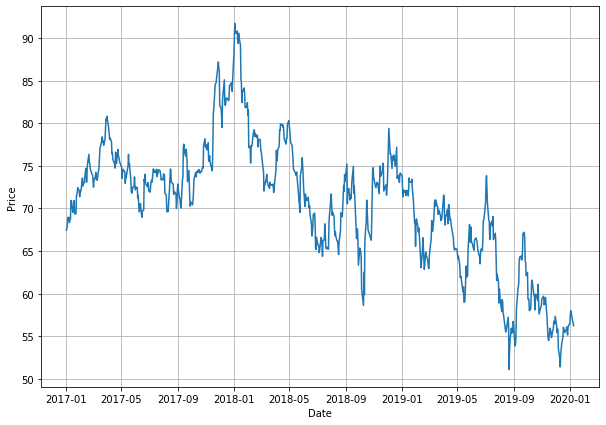

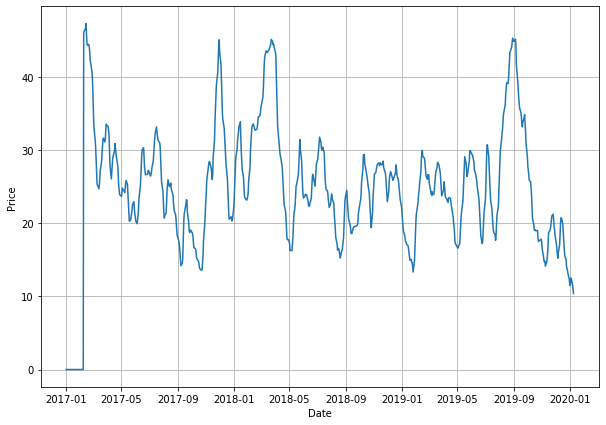

In [30]:
import matplotlib.pyplot as plt
def plot_graph(data,ylabel,xlabel):
  plt.figure(figsize=(10,7))
  plt.grid()
  plt.plot(data)
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
plot_graph(aapl['Adj Close'], 'Price', 'Date')
plot_graph(aapl['adx'], 'Price', 'Date')

Text(0.5, 0, 'Date')

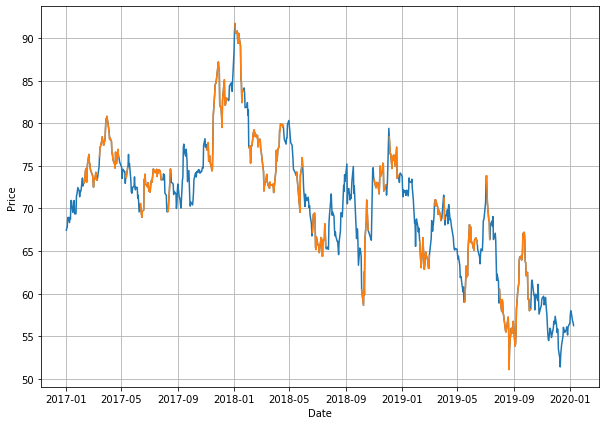

In [31]:
import numpy as np
aapl['trend'] = np.where(aapl.adx>25,aapl['Adj Close'],np.nan)

aapl['trend_signal'] = np.where(aapl.adx>25,1,0)
plt.figure(figsize=(10,7))
plt.grid()
plt.plot(aapl['Adj Close'])
plt.plot(aapl['trend'])
plt.ylabel('Price')
plt.xlabel('Date')

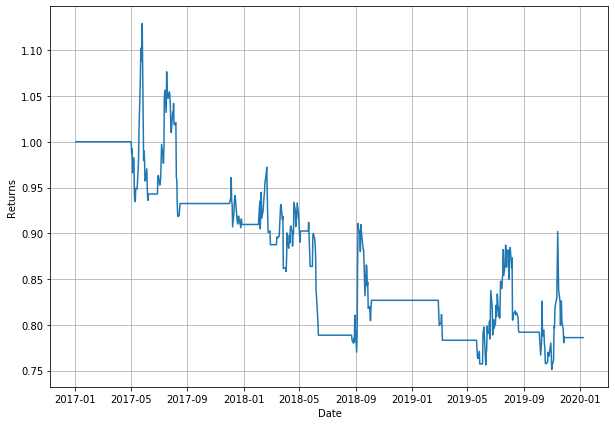

In [23]:
aapl['direction'] = np.where(aapl.pos_directional_indicator>aapl.neg_directional_indicator,1,-1) * aapl['trend_signal']
aapl['daily_returns'] = aapl['Adj Close'].pct_change()
aapl['strategy_returns'] = aapl.daily_returns.shift(-1) * aapl.direction
plot_graph((aapl['strategy_returns']+1).cumprod(), 'Returns', 'Date')